# **Master in Data Science and Computer Engineering**

### **A Multi-View Panorama of Data-Centric AI: Techniques, Tools, and Applications**

**Alberto Fernández**, University of Granada<br>
**Miriam Seoane Santos**, University of Porto<br>
**Pedro Henriques Abreu**, University of Coimbra<br>


## **T02: Data Complexity and Meta-Learning**
In this tutorial, we will discuss the basis of **data complexity** and **meta-learning** by exploring some popular open-source packages such as [problexity](https://problexity.readthedocs.io/en/latest/index.html), [pymfe](https://pymfe.readthedocs.io/en/latest/index.html), and [pyhard](https://ita-ml.gitlab.io/pyhard/index.html).

1. Introduction and Prerequisites
2. Data Complexity Assessment with [problexity](https://problexity.readthedocs.io/en/latest/index.html)
3. Exploring Additional Meta-Features with [pymfe](https://pymfe.readthedocs.io/en/latest/index.html)
4. Evaluating Instance Hardness with [pyhard](https://ita-ml.gitlab.io/pyhard/index.html)
5. Conclusions

*Let's get started!*

## **Introduction and Prerequisites**

While **data profiling** focuses on reporting on traditional descriptive statistics (e.g., mean, median, variance, distributiom of features), **data complexity** analysis aims to uncover additional meta-information on the data to allows us to characterise its structure and estimate its difficulty for several machine learning tasks.

- **Data Complexity** analysis is deeply related to **Meta-Learning**, although different authors may propose slightly distinct taxonomies of *data complexity measures* and *meta-features*. By far, the most well-known grouping of complexity measures is the one defined by [Ho and Basu (2002)](https://ieeexplore.ieee.org/document/990132), recently reviewed and reformulated in [Lorena et al. (2019)](https://dl.acm.org/doi/pdf/10.1145/3347711?casa_token=uuq5m-k0dlAAAAAA:f8ljB1v6k7OmqexA47Lp93MljR1YQ_Jc0IXFIcOoTCXYHkAVLARKukZ9YA7i7kJ7eb11aO8gMsK0). In this tutorial, we will investigate such data complexity measures with the help of [problexity](https://problexity.readthedocs.io/en/latest/index.html).

- **Meta-features** summarize other aspects of dataset's characteristics, where *data complexity measures* are considered one particular family of meta-features. For the purpose of this tutorial, we will consider the taxonomy proposed by [Rivolli et al. (2018)](https://www.researchgate.net/profile/Luis-Paulo-Garcia/publication/327336502_Towards_Reproducible_Empirical_Research_in_Meta-Learning/links/5b9276d24585153a5300fd0e/Towards-Reproducible-Empirical-Research-in-Meta-Learning.pdf), where five main groups are considered: *simple*, *statistical*, *information-theoretic*, *model-based*, and *landmarking* meta-features. We will use the associated package [pymfe](https://pymfe.readthedocs.io/en/latest/index.html) to compute them.

- **Instance Hardness** related to the complexity or difficulty (essentially, the perceived hardness), of individual instances (samples) in a dataset. While data complexity measures and meta-features refer generally to overall data characteristics (e.g., one measure refers to the whole dataset), *instance hardness* measures characterise a particular example in the input space, identifying which ones are harder to analyse. In this tutorial, we will focus on the measures reviewed by [Paiva et al. (2022)](https://link.springer.com/content/pdf/10.1007/s10994-022-06205-9.pdf) and their implementation provided in [pyhard](https://ita-ml.gitlab.io/pyhard/index.html) to explore instance complexity.

To discuss these concepts, we'll use the well-known [Iris Dataset](https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html). Its simplicity allows us to demonstrate the concepts on the fly (without the need of large computational resources), and enabling visualization in 2 or 3D.

### **Prerequisites**

To reproduce the following tutorial, we recommend the following steps:

- Create a new conda environment with Python 3.9
- Activate the environment
- Install `pyhard` using `pip`
- Downgrade `numpy` version to `1.23.3` (some conflicts have been reported for newer `numpy` versions)
- Install `problexity` and `pymfe` using `pip`
- Install `jupyter` and `ipykernel` in case you'd like to work with jupyter notebooks

```bash
conda create -n pyhard-tutorial python=3.9
conda activate python-tutorial
pip install pyhard
pip install -U numpy==1.23.3
pip install problexity
pip install -U pymfe
pip install jupyter ipykernel
```

In [1]:
!pip install pyhard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 1.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of holoviews to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of imbalanced-learn to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 4.7 MB/s eta 

In [2]:
!pip install -U numpy==1.23.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
opencv-python-headless 4.11.0.86 requires numpy>=1.23.5; python_version >= "3.11", but you have numpy 1.23.3 which is incompatible.
mizani 0.13.1 requires numpy>=1.23.5, but you have numpy 1.23.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
chex 0.1.88 requires numpy>=1.24.1, but you have numpy 1.23.3 which is incompatible.
opencv-contrib-python 4.10.0.84 requires numpy>=1.23.5; python_version >= "3.11", but you have numpy 1.23.3 whic

In [3]:
!pip install problexity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.4 MB/s eta 0:00:00


In [4]:
!pip install -U pymfe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.0/156.0 kB 3.8 MB/s eta 0:00:00


In [5]:
import warnings
warnings.filterwarnings('ignore')

## **Data Complexity Assessment with [problexity](https://problexity.readthedocs.io/en/latest/index.html)**

The [problexity](https://problexity.readthedocs.io/en/latest/index.html) package implements several data complexity measures as redefined by [Lorena et al. (2019)](https://dl.acm.org/doi/pdf/10.1145/3347711?casa_token=uuq5m-k0dlAAAAAA:f8ljB1v6k7OmqexA47Lp93MljR1YQ_Jc0IXFIcOoTCXYHkAVLARKukZ9YA7i7kJ7eb11aO8gMsK0), comprising **feature-based**, **linearity**, **neighbourhood**, **network**, **dimensionality**, and **class imbalance** measures, among a few additional others.

For additional details on the package developement, you might refer to [Komorniczak and Ksieniewicz (2023)](https://www.sciencedirect.com/science/article/pii/S0925231222014461?casa_token=TXCJhktSaH4AAAAA:ppqzKL8nhbJzEEpuVDzOYeWCuzzS4Oz9aDGLX6b1woHPS84qetrXmiquezSlOI6D_ZGP64oYuw).

In [6]:
import pandas as pd
from sklearn.datasets import load_iris

In [7]:
df = load_iris(as_frame=True, return_X_y=True)
df = pd.concat(df, axis=1)

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
print("Dataset Size: ", df.shape)
print("Target Distribution: ", df["target"].value_counts())
print("Missing Values: ", df.isna().sum().sum())

Dataset Size:  (150, 5)
Target Distribution:  0    50
1    50
2    50
Name: target, dtype: int64
Missing Values:  0


The **iris dataset** is quite simple:
- It comprises 150 features, and 4 main features (plus the target)
- There are 3 classes, each with 50 examples
- There are no missing values or class imbalance
- For additional details, we could produce a full report as in T01 (data profiling)

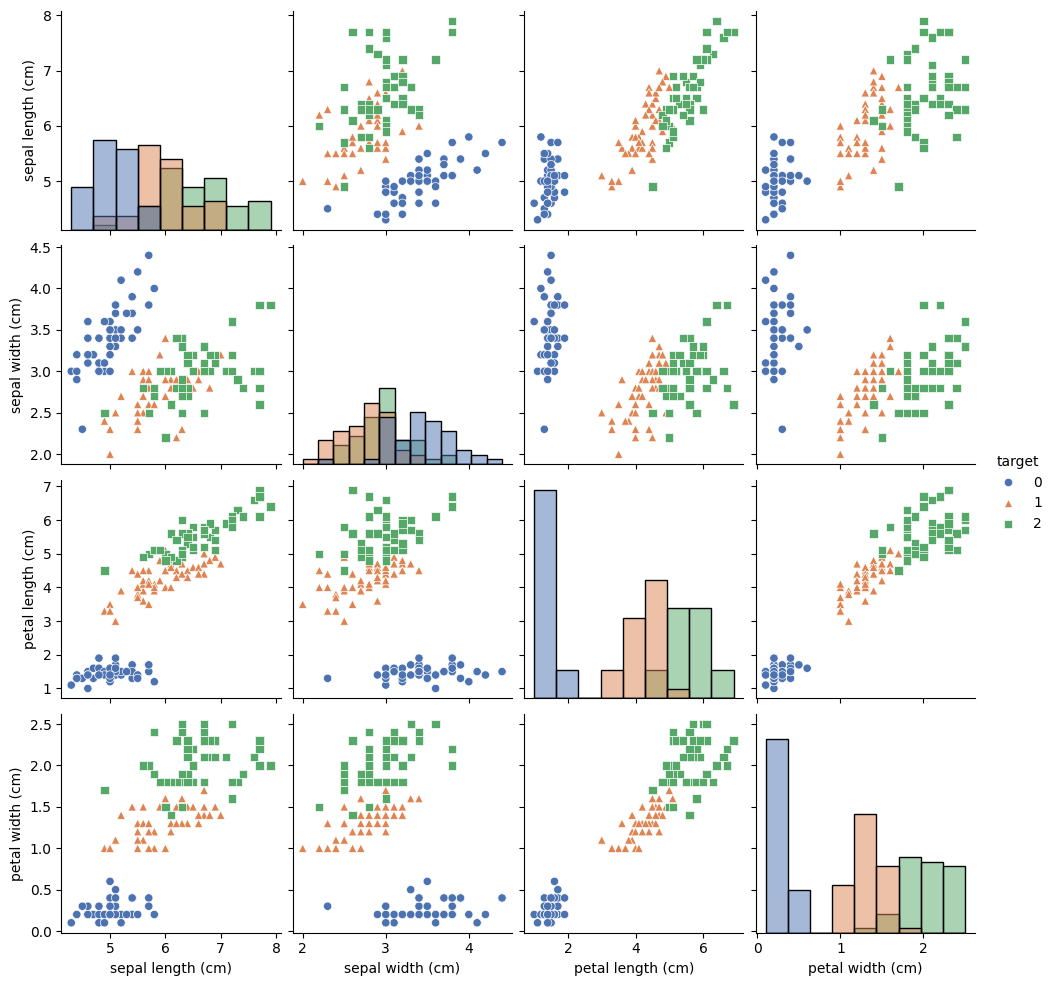

In [10]:
import seaborn as sns

sns.pairplot(df, diag_kind="hist", hue="target", markers=["o", "^", "s"], palette="deep")

The problexity library introduces the `ComplexityCalculator` to facilitate the computation and usage of the complexity measures. By default, the package will all 22 complexity measures ot the classification submodule:

In [11]:
import problexity as px

# Initialize ComplexityCalculator with default parametrization
cc = px.ComplexityCalculator()

Executing the `fit()` method, which takes a set of features `X` and a set of labels `y` as an argument, will calculate the values of the measures:

In [12]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# Fit model with data
cc.fit(X,y)

The complexity calculator object stores a list of estimated measures that can be read by the model's `complexity` attribute:

In [13]:
cc.complexity

[0.07869172973874734,
 0.026292653319947058,
 0.0063817663817663794,
 0.12333333333333334,
 0.043333333333333335,
 0.01076722138530393,
 0.01,
 0.0033333333333333335,
 0.015,
 0.24239805750497156,
 0.020000000000000018,
 0.01,
 0.07666666666666667,
 0.6055666666666666,
 0.7675420875420875,
 0.24031981627392285,
 0.6434159978656963,
 0.04,
 0.023333333333333334,
 0.5833333333333334,
 0.0,
 0.0]

They appear in the list in the same order as the declarations of the used metrics, which can be obtained from the hidden method `_metrics()`:

In [14]:
cc._metrics()

['f1',
 'f1v',
 'f2',
 'f3',
 'f4',
 'l1',
 'l2',
 'l3',
 'n1',
 'n2',
 'n3',
 'n4',
 't1',
 'lsc',
 'density',
 'clsCoef',
 'hubs',
 't2',
 't3',
 't4',
 'c1',
 'c2']

We can merge them into a single dataframe for ease of interpretation:

In [15]:
df_prbxty = pd.DataFrame(cc.complexity, index=cc._metrics(), columns=['ComplexityValue'])

In [16]:
df_prbxty

,ComplexityValue
f1,0.078692
f1v,0.026293
f2,0.006382
f3,0.123333
f4,0.043333
l1,0.010767
l2,0.010000
l3,0.003333
n1,0.015000
n2,0.242398


In [17]:
f1 = df_prbxty.loc["f1", "ComplexityValue"]
f1

0.07869172973874734

The obtained measures' values can be accessed as a single value sing the `score()` method. By default, for the classification task, the `score()` method will return the arithmetic mean of measured complexity measures.

In [18]:
cc.score()

0.16225951500056562

The `report()` method provides a more detailed description of the problem’s complexity, returnig a dictionary containing a summary of each measure value, their arithmetic mean, and other data set characteristics, such as the number of samples
and dimensionality.

In [19]:
cc.report()

{'n_samples': 150,
 'n_features': 4,
 'score': 0.162,
 'complexities': {'f1': 0.079,
  'f1v': 0.026,
  'f2': 0.006,
  'f3': 0.123,
  'f4': 0.043,
  'l1': 0.011,
  'l2': 0.01,
  'l3': 0.003,
  'n1': 0.015,
  'n2': 0.242,
  'n3': 0.02,
  'n4': 0.01,
  't1': 0.077,
  'lsc': 0.606,
  'density': 0.768,
  'clsCoef': 0.24,
  'hubs': 0.643,
  't2': 0.04,
  't3': 0.023,
  't4': 0.583,
  'c1': 0.0,
  'c2': 0.0},
 'n_classes': 3,
 'classes': 3,
 'prior_probability': array([0.33333333, 0.33333333, 0.33333333]),
 'complexities_std': {'f1': 0.076,
  'f1v': 0.027,
  'f2': 0.009,
  'f3': 0.174,
  'f4': 0.061,
  'l1': 0.015,
  'l2': 0.014,
  'l3': 0.007,
  'n1': 0.014,
  'n2': 0.089,
  'n3': 0.028,
  'n4': 0.015,
  't1': 0.073,
  'lsc': 0.144,
  'density': 0.052,
  'clsCoef': 0.042,
  'hubs': 0.05,
  't2': 0.0,
  't3': 0.005,
  't4': 0.118,
  'c1': 0.0,
  'c2': 0.0}}

In [20]:
report = cc.report()
cmplxty_measures = report["complexities"]
cmplxty_std = report["complexities_std"]

df_cmplxty_measures = pd.DataFrame(cmplxty_measures, index=[0])
df_cmplxty_std = pd.DataFrame(cmplxty_std, index=[0])

df_cmplxty_report = pd.concat([df_cmplxty_measures.T, df_cmplxty_std.T], axis=1)
df_cmplxty_report.columns = ['Complexity', 'Std']

In [21]:
df_cmplxty_report

,Complexity,Std
f1,0.079,0.076
f1v,0.026,0.027
f2,0.006,0.009
f3,0.123,0.174
f4,0.043,0.061
l1,0.011,0.015
l2,0.010,0.014
l3,0.003,0.007
n1,0.015,0.014
n2,0.242,0.089


The values can also be represented in the form of a graphic. Executing the `plot()` method returns a chart that illustrates the value of each measure from respective categories as well as the default score of the problem:

<PolarAxes: >

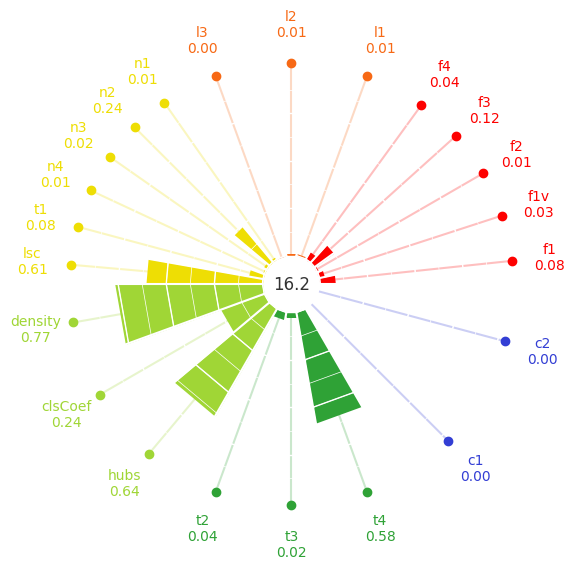

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
cc.plot(fig, (1,1,1))

The graphic is essencially a polar projection showcasing all measures, where each catergory of measures is grouped into colors:

<ul>
<li><span style="color: red">Red</span> - feature-based measures</li>
<li><span style="color: orange">Orange</span> - linearity measures</li>
<li><span style="color: yellow">Yellow</span> - neighbourhood measures</li>
<li><span style="color: green">Green</span> - network measures</li>
<li><span style="color: teal">Teal</span> - dimensionality measures</li>
<li><span style="color: blue">Blue</span> - class imbalance measures</li>
</ul>

Each family occupies the same area in the graphic, meaning that contexts that are less numerous in metrics (e.g., class imbalance) are not dominates in this presentation by categories described by many metrics (e.g., neighbourhood).

**As expected, the iris dataset is not highly complex, although some measures stand out:**

- **Density (0.77):** (Average Density of the Network) - Higher values indicate a lower number of edges in the graph (i.e., higher sparsity, lower density). This could indicate that some examples of the same class are far apart in the input space.

- **Hubs (0.64)**: (Hub Score) - In regions where is high overlapping of classes, strong vertexes will tend to be less connected to strong neighbors, revealing higher hub scores.

- **T4 (0.58)**: (Ratio of the PCA Dimensions to the Original Dimension) -  The larger the T4 value, the more of the original features are needed to describe data variability, which indicates a more complex relationship of the input variables.

## **Exploring Additional Meta-Features with [pymfe](https://pymfe.readthedocs.io/en/latest/index.html)**

Beyond **data complexity measures**, [pymfe](https://pymfe.readthedocs.io/en/latest/index.html) is a meta-feature extractor that comprises meta-features from other groups:

- **General:** Known as *simple measures* (e.g., number of instances, attributes and classes)
- **Statistical:** Statistical descriptors to describe the numerical properties of data distribution
- **Information-theoretic:** To describe discrete (categorical) attributes and their relationship with the classes
- **Model-based:** Designed to extract characteristics from simple machine learning models
- **Landmarking:** Related to the performance of simple and efficient learning algorithms
- **Clustering:** To extract information about dataset based on external validation indexes
- **Concept:** To estimate the variability of class labels among examples and the examples density
- **Itemset:** To compute the correlation between binary attributes
- (**Complexity:** Estimate the difficulty in separating the data points into their expected classes)


For additional details on the package developement, you might refer to [Alcobaça et al. (2020)](https://www.jmlr.org/papers/volume21/19-348/19-348.pdf) and [Rivolli et al. (2018)](https://www.researchgate.net/profile/Luis-Paulo-Garcia/publication/327336502_Towards_Reproducible_Empirical_Research_in_Meta-Learning/links/5b9276d24585153a5300fd0e/Towards-Reproducible-Empirical-Research-in-Meta-Learning.pdf).

You can easily list all available meta-features and associated references to check further implementation details:

In [23]:
from pymfe.mfe import MFE
MFE.metafeature_description(sort_by_group=True, sort_by_mtf=True, include_references=True)

+-------------+-------------------+----------------------+---------------------+
|    Group    | Meta-feature name |     Description      |      Reference      |
+=============+===================+======================+=====================+
| clustering  | ch                | Compute the Calinski | [1] T. Calinski, J. |
|             |                   | and Harabasz index.  | Harabasz, A         |
|             |                   |                      | dendrite method for |
|             |                   |                      | cluster analysis,   |
|             |                   |                      | Commun. Stat.       |
|             |                   |                      | Theory Methods 3    |
|             |                   |                      | (1) (1974) 1–27.    |
|             |                   |                      |                     |
+-------------+-------------------+----------------------+---------------------+
| clustering  | int         

The simplest way to extract meta-features is by instantiating the `MFE` class. By default, it computes **five meta-feature groups** using **mean and standard deviation** as summary functions, but you can also specify particular groups using `groups`). The `fit` method can be called by passing the `X` and `y`. Then the `extract` method is used to extract the related measures.

In [24]:
# Extract general measures
mfe = MFE(groups="general")
mfe.fit(X, y)
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

attr_to_inst                                                  0.02666666666666667
cat_to_num                                                                    0.0
freq_class.mean                                                0.3333333333333333
freq_class.sd                                                                 0.0
inst_to_attr                                                                 37.5
nr_attr                                                                         4
nr_bin                                                                          0
nr_cat                                                                          0
nr_class                                                                        3
nr_inst                                                                       150
nr_num                                                                          4
num_to_cat                                                                    nan


In [25]:
# Extract complexity measures
mfe = MFE(groups="complexity")
mfe.fit(X, y)
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

c1                                                             0.9999999999999998
c2                                                                            0.0
cls_coef                                                       0.2674506351402339
density                                                        0.8329306487695749
f1.mean                                                        0.2775641932566493
f1.sd                                                          0.2612622587707819
f1v.mean                                                     0.026799629786085716
f1v.sd                                                        0.03377041736533042
f2.mean                                                     0.0063817663817663794
f2.sd                                                        0.011053543615254369
f3.mean                                                       0.12333333333333334
f3.sd                                                         0.21361959960016152
f4.mean         

Several measures return more than one value. To aggregate the returned values, summarization functions can be used. This method can compute `min`, `max`, `mean`, `median`, `kurtosis`, `standard deviation`, among others. **The default methods are the `mean` and the `sd`.**

In [26]:
# Extract complexity measures with summarization
mfe = MFE(groups="complexity", summary="max")
mfe.fit(X, y)
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

c1                                                             0.9999999999999998
c2                                                                            0.0
cls_coef                                                       0.2674506351402339
density                                                        0.8329306487695749
f1.max                                                          0.599217152923665
f1v.max                                                       0.06570783253244587
f2.max                                                        0.01914529914529914
f3.max                                                                       0.37
f4.max                                                                       0.13
hubs.max                                                                      1.0
l1.max                                                       0.013033824398726246
l2.max                                                       0.040000000000000036
l3.max          

**In meta-learning, we can formulate a serious of questions aiming at understanding the relationships between dataset's characteristics (meta-features) and machine learning outcomes:**

- Can we predict the performance of a given algorithm on a new dataset based on its meta-features?

- Which meta-features are associated with optimal hyperparameter settings for different models?

- Which meta-features indicate the need for specific preprocessing steps?

- Can meta-features be used to predict the effectiveness of transferring a pre-trained model to a new task?

- How do dataset characteristics affect the trade-off between model accuracy and interpretability for different classifiers?

An example from [Santos et al. (2018)](https://ieeexplore.ieee.org/document/8492368), where data complexity measured were used to characterise the behaviour of well-known oversampling algorithms for imbalanced learning:

![meta-analysis example](https://raw.githubusercontent.com/miriamspsantos/ai-and-society-course/refs/heads/main/public/img/tutorials/T02/meta_analysis_example.png)

## **Evaluating Instance Hardness with [pyhard](https://ita-ml.gitlab.io/pyhard/index.html)**

Contrarily to the previous packages, [pyhard](https://ita-ml.gitlab.io/pyhard/index.html) focuses on identifying particular "problematic" individual examples. These **hard instances** tend to lie near class boundaries or overlap with examples from other classes, although there are other factors that make them "hard to learn". **Understanding which examples are difficult enables the development of tailored approaches and fosters the explanability of outcomes.**

![instance hardness measures](https://raw.githubusercontent.com/miriamspsantos/ai-and-society-course/refs/heads/main/public/img/tutorials/T02/hardness_measures.png)

For additional details on these metrics and the [pyhard](https://ita-ml.gitlab.io/pyhard/index.html) package, you might refer to [Paiva et al. (2021)](https://arxiv.org/pdf/2109.14430), and [Paiva et al. (2022)](https://link.springer.com/content/pdf/10.1007/s10994-022-06205-9.pdf).

In [27]:
from pyhard.measures import ClassificationMeasures

In [28]:
m = ClassificationMeasures(df)
df_meta_features = m.calculate_all()

INFO:pyhard.measures:Calculating measure 'kDN'
INFO:pyhard.measures:Calculating measure 'DS'
INFO:pyhard.measures:Calculating measure 'DCP'
INFO:pyhard.measures:Calculating measure 'TD_P'
INFO:pyhard.measures:Calculating measure 'TD_U'
INFO:pyhard.measures:Calculating measure 'CL'
INFO:pyhard.measures:Calculating measure 'CLD'
INFO:pyhard.measures:Calculating measure 'MV'
INFO:pyhard.measures:Calculating measure 'CB'
INFO:pyhard.measures:Calculating measure 'N1'
INFO:pyhard.measures:Calculating measure 'N2'
INFO:pyhard.measures:Calculating measure 'LSC'
INFO:pyhard.measures:Calculating measure 'LSR'
INFO:pyhard.measures:Calculating measure 'Harmfulness'
INFO:pyhard.measures:Calculating measure 'Usefulness'
INFO:pyhard.measures:Calculating measure 'F1'
INFO:pyhard.measures:Calculating measure 'F2'
INFO:pyhard.measures:Calculating measure 'F3'
INFO:pyhard.measures:Calculating measure 'F4'


In [29]:
df_meta_features

,feature_kDN,feature_DS,feature_DCP,feature_TD_P,feature_TD_U,feature_CL,feature_CLD,feature_MV,feature_CB,feature_N1,feature_N2,feature_LSC,feature_LSR,feature_Harmfulness,feature_Usefulness,feature_F1,feature_F2,feature_F3,feature_F4
0,0.0,0.000000,0.0,0.2,0.2,0.066082,0.050373,0.0,0.75,0.0,0.037724,0.00,0.000000,0.0,0.02,0.375,0.300000,0.413796,0.521739
1,0.0,0.000000,0.0,0.2,0.2,0.066082,0.050373,0.0,0.75,0.0,0.060806,0.02,0.000520,0.0,0.02,0.500,0.300000,0.431968,0.615914
2,0.0,0.000000,0.0,0.2,0.2,0.066082,0.050373,0.0,0.75,0.0,0.040443,0.00,0.000000,0.0,0.02,0.250,0.300000,0.399639,0.555904
3,0.0,0.000000,0.0,0.2,0.2,0.066082,0.050373,0.0,0.75,0.0,0.054677,0.00,0.000000,0.0,0.02,0.250,0.300000,0.409559,0.594186
4,0.0,0.000000,0.0,0.2,0.2,0.066082,0.050373,0.0,0.75,0.0,0.057786,0.00,0.000000,0.0,0.02,0.375,0.300000,0.397403,0.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.142857,0.0,0.6,0.6,0.047067,0.042074,0.0,0.75,0.0,0.286813,0.76,0.736393,0.0,0.50,0.375,0.248196,0.405961,0.608295
146,0.2,0.142857,0.0,0.6,0.6,0.053225,0.048211,0.0,0.75,0.0,0.436009,0.94,0.863350,0.0,0.84,0.500,0.347339,0.438189,0.510569
147,0.1,0.142857,0.0,0.6,0.6,0.047150,0.042156,0.0,0.75,0.0,0.318624,0.84,0.786451,0.0,0.40,0.375,0.314815,0.430502,0.608295
148,0.0,0.142857,0.0,0.6,0.6,0.047067,0.042074,0.0,0.75,0.0,0.178166,0.58,0.581352,0.0,0.68,0.375,0.248196,0.389303,0.492492


Rather than having one measure per dataset, now each instance in the input space has its own "hardness" characterization. For visualization purposes, we can produce a **2D embedding of the data using Principal Component Analysis (PCA)**, and plot each instance colored by its difficulty values:

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [32]:
pca = PCA(n_components=2)
pc = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pc, columns=['z_1', 'z_2'])

In [33]:
pca_df

,z_1,z_2
0,-2.576120,0.474499
1,-2.415322,-0.678092
2,-2.659333,-0.348282
3,-2.601991,-0.603306
4,-2.683744,0.640220
...,...,...
145,2.233024,0.389352
146,1.966862,-0.896264
147,1.928996,0.268890
148,1.806149,1.009217


In [34]:
pca_df["kDN"] = df_meta_features["feature_kDN"]
pca_df["target"] = df.target

In [35]:
pca_df

,z_1,z_2,kDN,target
0,-2.576120,0.474499,0.0,0
1,-2.415322,-0.678092,0.0,0
2,-2.659333,-0.348282,0.0,0
3,-2.601991,-0.603306,0.0,0
4,-2.683744,0.640220,0.0,0
...,...,...,...,...
145,2.233024,0.389352,0.0,2
146,1.966862,-0.896264,0.2,2
147,1.928996,0.268890,0.1,2
148,1.806149,1.009217,0.0,2


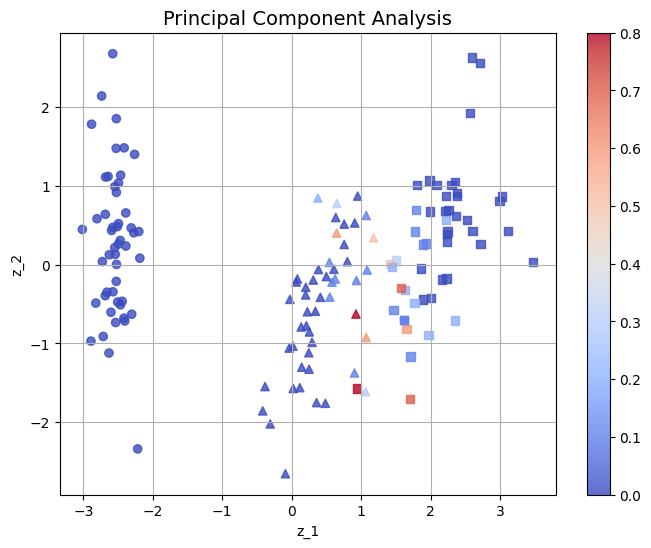

In [36]:
import matplotlib.pyplot as plt

marker_map = {0: 'o', 1: '^', 2: 's'}
plt.figure(figsize=(8, 6))

for target in range(3):
    subset = pca_df[pca_df["target"] == target]
    scatter = plt.scatter(subset["z_1"], subset["z_2"],
                label=target,
                marker=marker_map[target],
                c=subset["kDN"],
                cmap='coolwarm',
                alpha=0.8)

plt.colorbar(scatter)

plt.title("Principal Component Analysis", fontsize=14)
plt.xlabel("z_1")
plt.ylabel("z_2")

plt.grid()
plt.show()

As expected, kDN will associate a higher "hardness" to examples that lie in the borderline between distinct class concepts. We can experiment with the remaining measures to uncover additional insights.

Additionally, [pyhard](https://ita-ml.gitlab.io/pyhard/index.html) also enables a different embedding known as **Instance Space Analysis (ISA)**, as a way to visualize the relationship between algorithm performance and the estimated instance hardness measures extracted from the data. This analysis reveals regions of strengths and weaknesses of predictors (i.e., "footprints"), and highlights individual instances within a dataset that warrant further investigation, either due to their unique properties or potential data quality issues.

To experiment with ISA, you can [try the following steps](https://ita-ml.gitlab.io/pyhard/start.html):

- Activate the environment where `pyhard` is installed (e.g., `conda activate pyhard-tutorial`)
- In your working directory run `pyhard init`, which will generate both `config.yaml` and `options.json`
- Get a `.csv` file with your data in the desired directory, and make sure the `datafile` field is set in `config.yaml`
- Run `pyhard run`
- By default, the hardness measures will be calculated and the **ISA** representation will be created with the *footprint* areas
- To explore the results, launch `pyhard app`
- It will open a browser window with a UI for you to explore the data

![isa example](https://raw.githubusercontent.com/miriamspsantos/ai-and-society-course/refs/heads/main/public/img/tutorials/T02/isa_example.png)

## **Conclusions**

> **Data complexity measures are extremely useful to data practitioners since they provide insights on how to approach machine learning tasks from the start:**

- Choosing appropriate algorithms that align with the meta-characteristics of datasets
- Producing a tailored preprocessing based on the complexity of data examples
- Improving model interpretability, using complexity measures to diagnose and correct performance or bias issues
- (...)

Throughout this tutorial, we covered the basis of data complexity and meta-learning, trying to find relationships between the complexity measures, instance hardness measures, and meta-features and difficulty of our classification problems. However, **the field of problem complexity is still very active**, with increasing proposals of new measures, especially now extending the analysis to related fields of machine learning, such as [Bias and Fairness](https://arxiv.org/pdf/2407.14210) and [Trustworthy AI](https://dl.acm.org/doi/pdf/10.1145/3615354?casa_token=bkfBxNHhV6cAAAAA:S05z5VR33rZaHYzvHX039GaV3sagIUc_auRpiFkksmH1JG_YsPH7qz6SqbDYQJoV5rEgL1iz1G3w). Yet, a problem that remains is how to define measures that [capture multiple factors of difficulty](https://www.sciencedirect.com/science/article/pii/S1566253522001099?casa_token=ydUfkjsACHsAAAAA:G1tC-ZDOftcLbOUakio9_WvQZumPA5tAHiknPxxJTsR1Dv9U7cgU3kcZMUN98Jd7pjZHQiKAtQ), especially in real-world domains, where several issues arise simultaneously and their impact cannot be measured as the "sum of its parts", as some have shown to have intricate interplay dynamics.

## **Bibliography**
- To consolidate the concepts discussed herein, please refer to the following:
    - Ho, T. K., & Basu, M. (2002). [Complexity measures of supervised classification problems](https://ieeexplore.ieee.org/document/990132). IEEE transactions on pattern analysis and machine intelligence, 24(3), 289-300.
    - Lorena, A. C., Garcia, L. P., Lehmann, J., Souto, M. C., & Ho, T. K. (2019). [How complex is your classification problem? a survey on measuring classification complexity](https://dl.acm.org/doi/pdf/10.1145/3347711?casa_token=uuq5m-k0dlAAAAAA:f8ljB1v6k7OmqexA47Lp93MljR1YQ_Jc0IXFIcOoTCXYHkAVLARKukZ9YA7i7kJ7eb11aO8gMsK0). ACM Computing Surveys (CSUR), 52(5), 1-34.
    - Komorniczak, J., & Ksieniewicz, P. (2023). [problexity: An open-source Python library for supervised learning problem complexity assessment](https://www.sciencedirect.com/science/article/pii/S0925231222014461?casa_token=TXCJhktSaH4AAAAA:ppqzKL8nhbJzEEpuVDzOYeWCuzzS4Oz9aDGLX6b1woHPS84qetrXmiquezSlOI6D_ZGP64oYuw). Neurocomputing, 521, 126-136
    - Alcobaça, E., Siqueira, F., Rivolli, A., Garcia, L. P., Oliva, J. T., & De Carvalho, A. C. (2020). [MFE: Towards reproducible meta-feature extraction](https://www.jmlr.org/papers/volume21/19-348/19-348.pdf). Journal of Machine Learning Research, 21(111), 1-5.
    - Rivolli, A., Garcia, L. P., Soares, C., Vanschoren, J., & de Carvalho, A. C. (2018). [Towards reproducible empirical research in meta-learning](https://www.researchgate.net/profile/Luis-Paulo-Garcia/publication/327336502_Towards_Reproducible_Empirical_Research_in_Meta-Learning/links/5b9276d24585153a5300fd0e/Towards-Reproducible-Empirical-Research-in-Meta-Learning.pdf). arXiv preprint arXiv:1808.10406, 32-52.
    - Santos, M. S., Soares, J. P., Abreu, P. H., Araujo, H., & Santos, J. (2018). [Cross-validation for imbalanced datasets: avoiding overoptimistic and overfitting approaches [research frontier]](https://ieeexplore.ieee.org/document/8492368). IEEE Computational Intelligence Magazine, 13(4), 59-76.
    - Paiva, P. Y. A., Smith-Miles, K., Valeriano, M. G., & Lorena, A. C. (2021). [PyHard: a novel tool for generating hardness embeddings to support data-centric analysis](https://arxiv.org/pdf/2109.14430). arXiv preprint arXiv:2109.14430.
    - Paiva, P. Y. A., Moreno, C. C., Smith-Miles, K., Valeriano, M. G., & Lorena, A. C. (2022). [Relating instance hardness to classification performance in a dataset: a visual approach](https://link.springer.com/content/pdf/10.1007/s10994-022-06205-9.pdf). Machine Learning, 111(8), 3085-3123.
    - Pascual-Triana, J. D., Fernández, A., Novais, P., & Herrera, F. (2024). [Fair Overlap Number of Balls (Fair-ONB): A Data-Morphology-based Undersampling Method for Bias Reduction](https://arxiv.org/pdf/2407.14210). arXiv preprint arXiv:2407.14210.
    - Lorena, A. C., Paiva, P. Y., & Prudêncio, R. B. (2024). [Trusting my predictions: on the value of Instance-Level analysis](https://dl.acm.org/doi/pdf/10.1145/3615354?casa_token=bkfBxNHhV6cAAAAA:S05z5VR33rZaHYzvHX039GaV3sagIUc_auRpiFkksmH1JG_YsPH7qz6SqbDYQJoV5rEgL1iz1G3w). ACM Computing Surveys, 56(7), 1-28.
    - Santos, M. S., Abreu, P. H., Japkowicz, N., Fernández, A., & Santos, J. (2023). [A unifying view of class overlap and imbalance: Key concepts, multi-view panorama, and open avenues for research](https://www.sciencedirect.com/science/article/pii/S1566253522001099?casa_token=ydUfkjsACHsAAAAA:G1tC-ZDOftcLbOUakio9_WvQZumPA5tAHiknPxxJTsR1Dv9U7cgU3kcZMUN98Jd7pjZHQiKAtQ). Information Fusion, 89, 228-253.
